# Gun Stocks Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Gun Stocks
title = "Gun Stocks"
symbols = ['SWBI', 'RGR', 'VSTO', 'OLN', 'SPWH', 'AAXN', 'BGFV']
start = '2020-01-01'
end = '2020-10-16'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

287

In [7]:
df.head()

,SWBI,RGR,VSTO,OLN,SPWH,AAXN,BGFV
Date,,,,,,,
2020-01-02,7.027052,43.791065,7.09,16.290392,7.635,76.559998,2.916299
2020-01-03,7.141999,44.180981,7.08,15.956765,7.650,73.930000,2.916299
2020-01-06,7.348902,45.072208,7.23,16.023491,8.220,68.750000,3.108794
2020-01-07,7.264608,44.858685,7.10,16.042555,8.440,69.769997,3.022171
2020-01-08,7.295260,45.675652,7.02,15.909107,8.640,69.610001,3.060670


In [8]:
df.tail()

,SWBI,RGR,VSTO,OLN,SPWH,AAXN,BGFV
Date,,,,,,,
2020-10-09,16.790001,65.589996,21.450001,15.370000,16.660000,98.989998,8.10
2020-10-12,16.500000,65.550003,20.629999,15.710000,16.430000,99.180000,7.96
2020-10-13,16.620001,65.559998,20.820000,16.190001,16.850000,101.750000,8.30
2020-10-14,16.440001,65.389999,20.620001,17.559999,17.040001,101.419998,8.22
2020-10-15,16.780001,66.989998,20.870001,17.200001,17.120001,105.860001,8.69


In [9]:
df.min()

SWBI     4.559538
RGR     38.452953
VSTO     4.800000
OLN      9.013595
SPWH     4.300000
AAXN    52.610001
BGFV     0.698748
dtype: float64

In [10]:
df.max()

SWBI     21.045992
RGR      83.916054
VSTO     23.000000
OLN      18.393909
SPWH     17.510000
AAXN    105.860001
BGFV      8.690000
dtype: float64

In [11]:
df.describe()

,SWBI,RGR,VSTO,OLN,SPWH,AAXN,BGFV
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.667557,58.479674,12.556650,12.917141,10.716625,81.874200,3.417705
std,5.034987,11.929120,5.315731,2.154348,4.336542,10.578901,2.209801
min,4.559538,38.452953,4.800000,9.013595,4.300000,52.610001,0.698748
25%,7.232040,47.449042,7.742500,11.256542,6.487500,74.634998,1.643534
50%,8.283799,56.924280,10.110000,12.176005,10.480000,82.639999,2.916299
75%,16.709366,67.831205,18.180000,14.709635,14.467500,89.570002,5.620000
max,21.045992,83.916054,23.000000,18.393909,17.510000,105.860001,8.690000


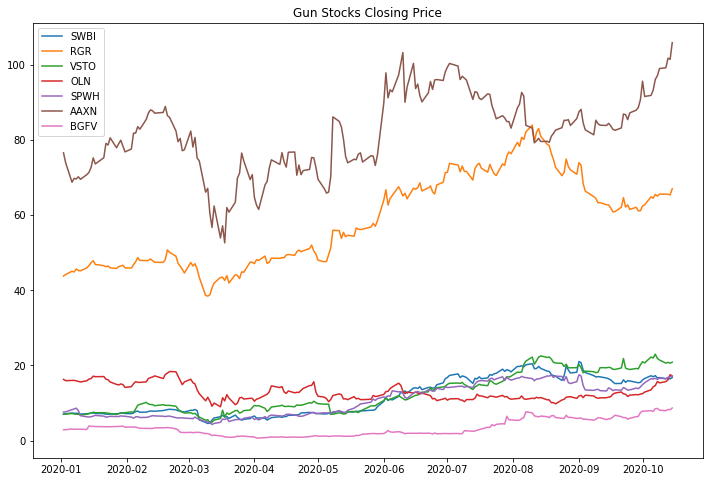

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [13]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

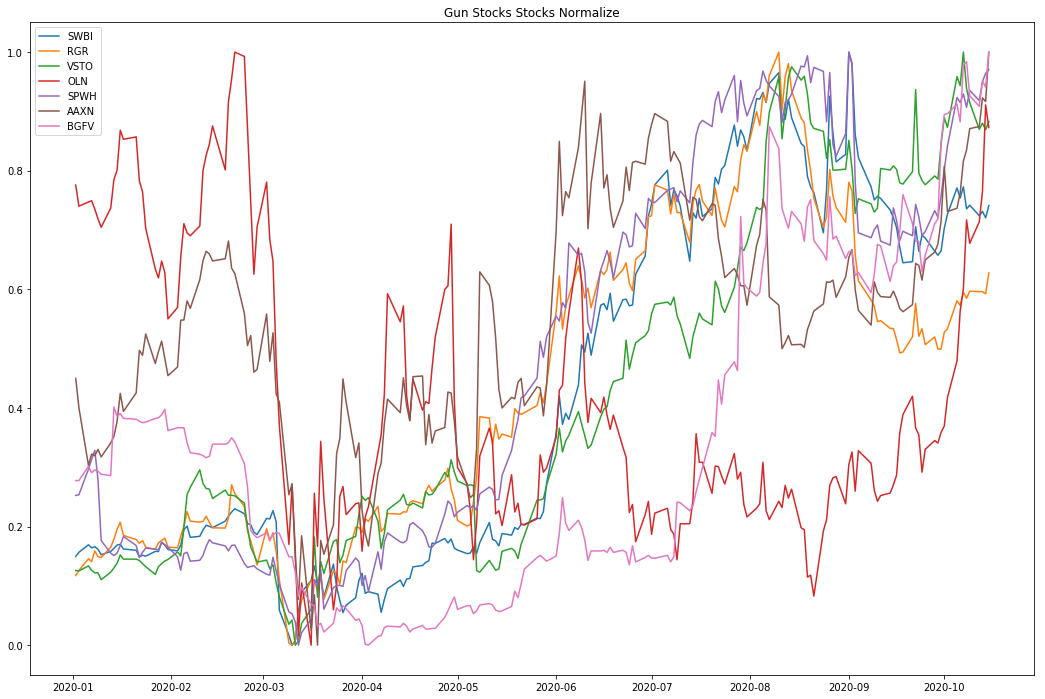

In [14]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [15]:
stock_rets = df.pct_change().dropna()

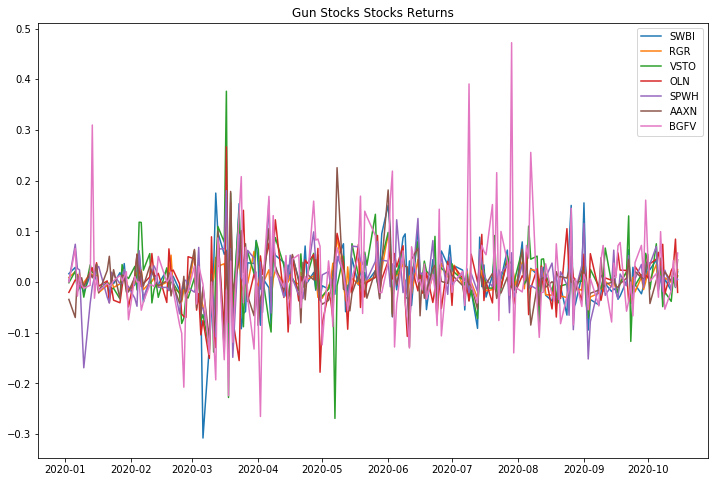

In [16]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

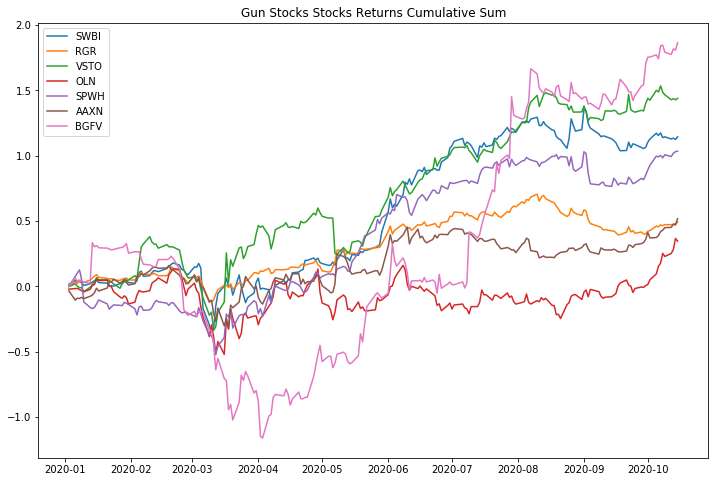

In [17]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

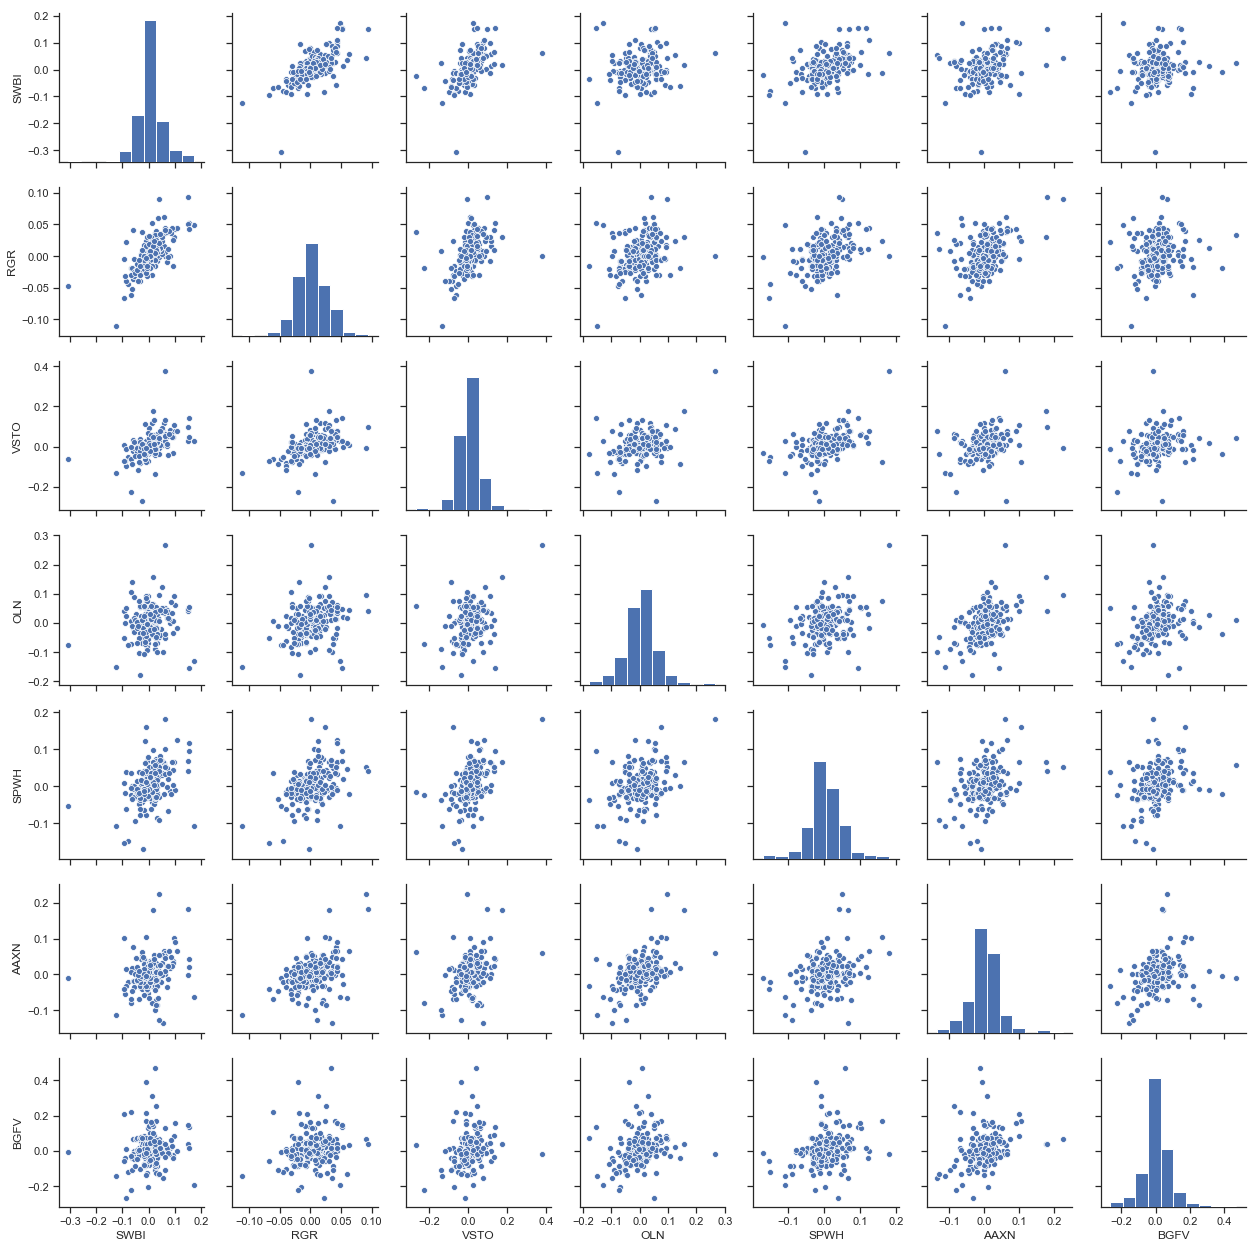

In [18]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

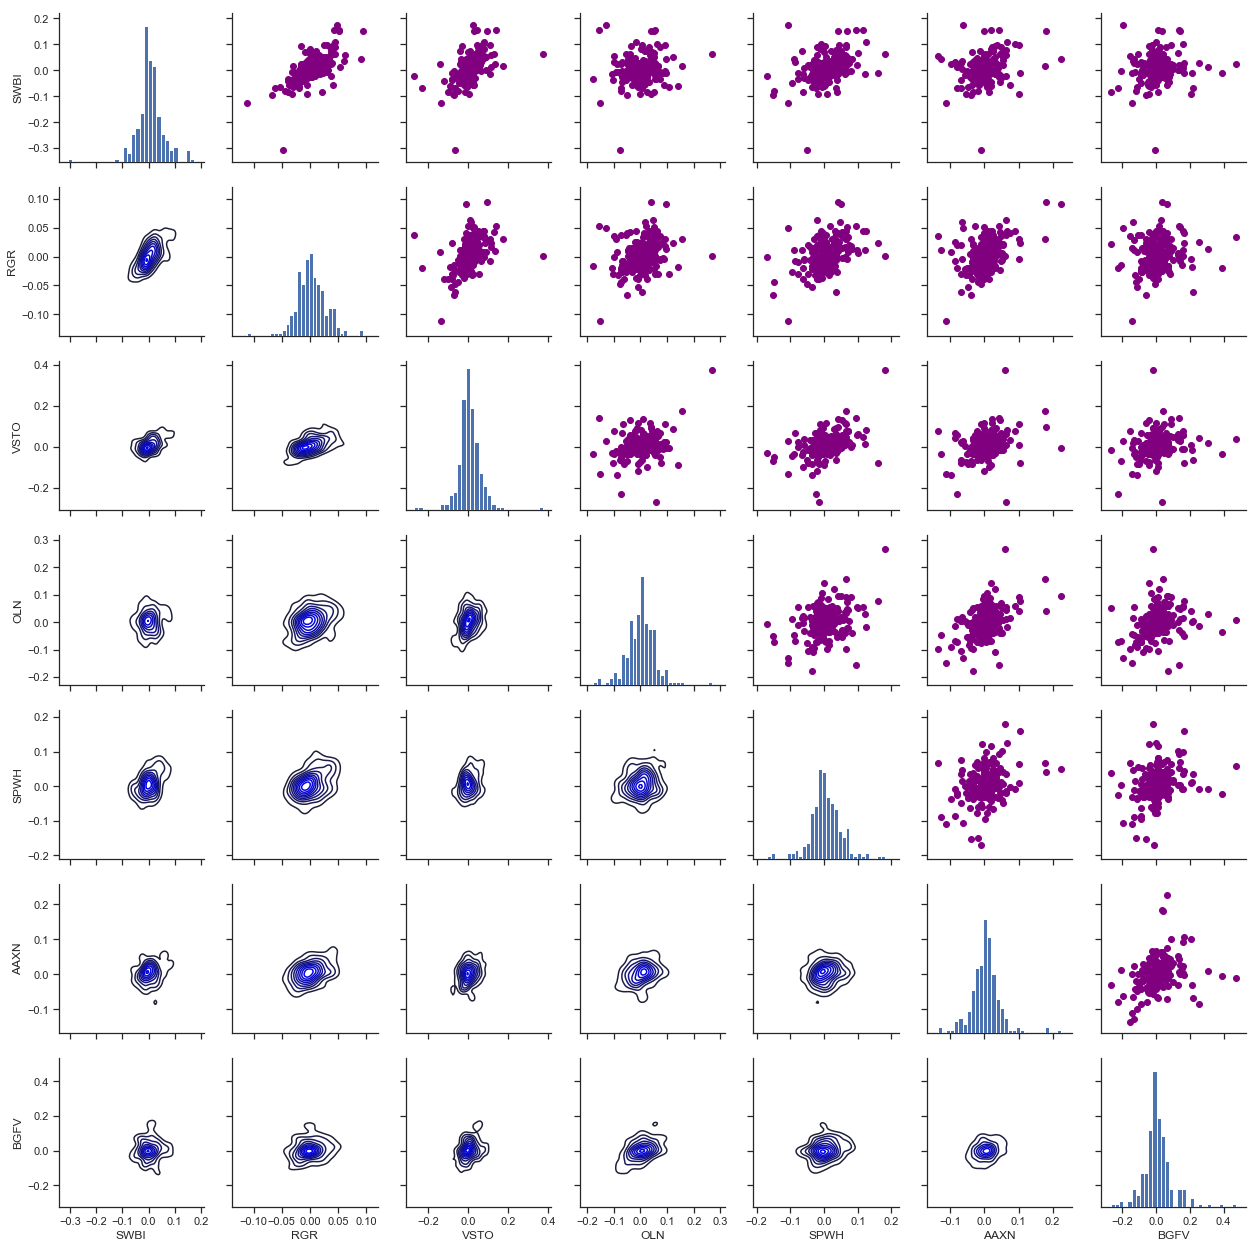

In [19]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

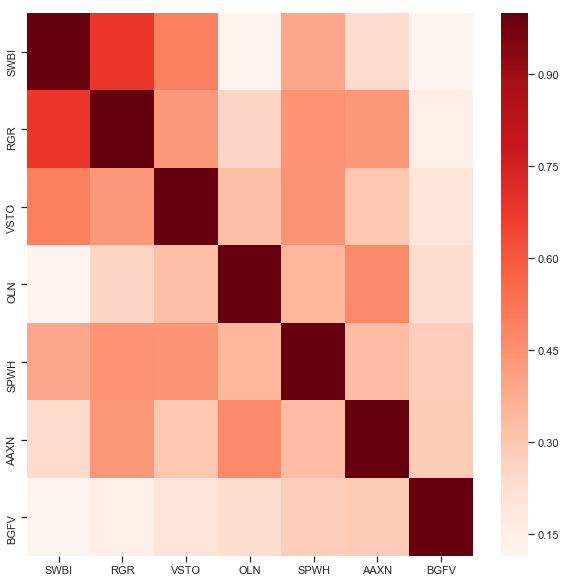

In [20]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

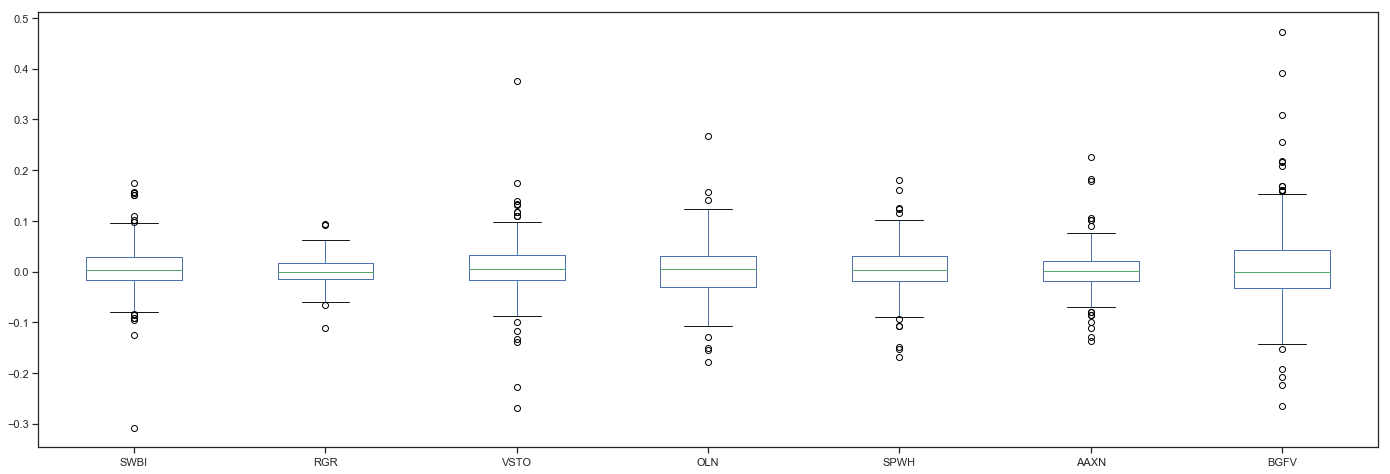

In [21]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

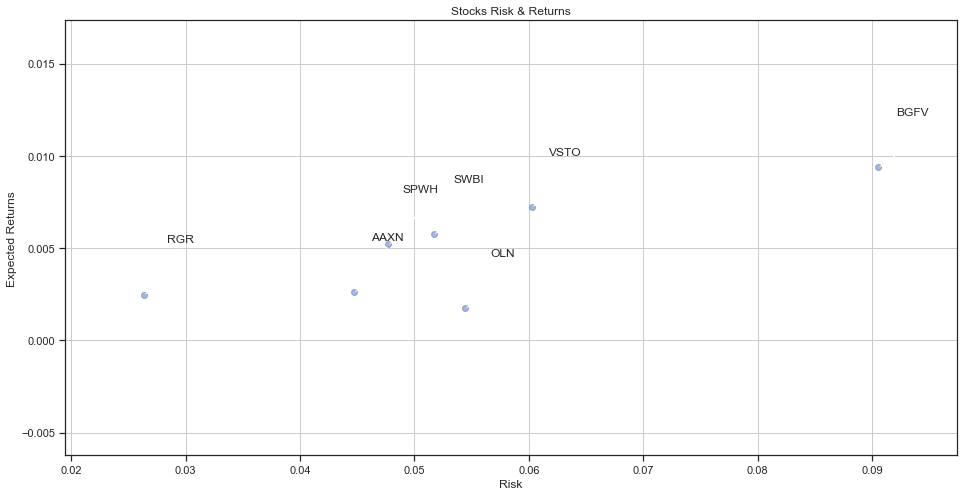

In [22]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

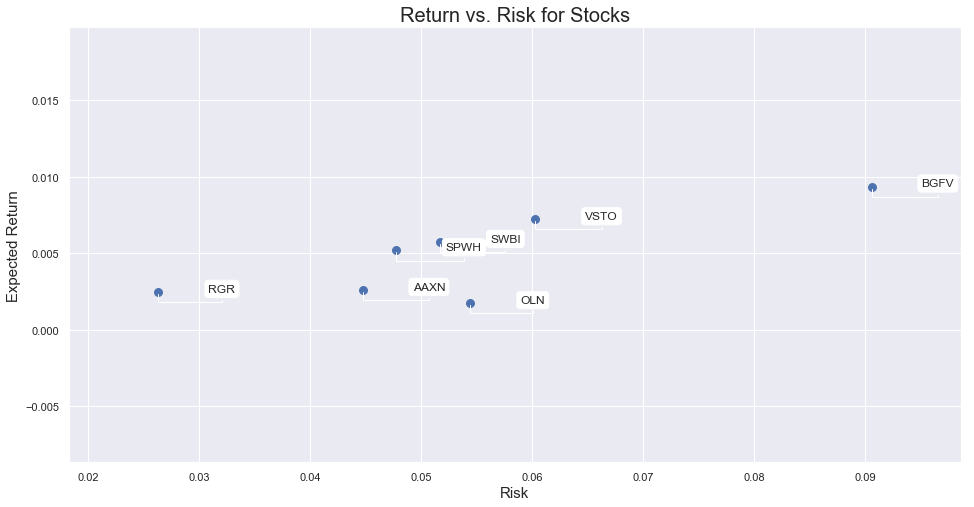

In [23]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [24]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [25]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
SWBI,1.449417,0.820663
RGR,0.625755,0.418085
VSTO,1.822841,0.956793
OLN,0.438754,0.864144
SPWH,1.310831,0.757645
AAXN,0.656083,0.709880
BGFV,2.361165,1.437576


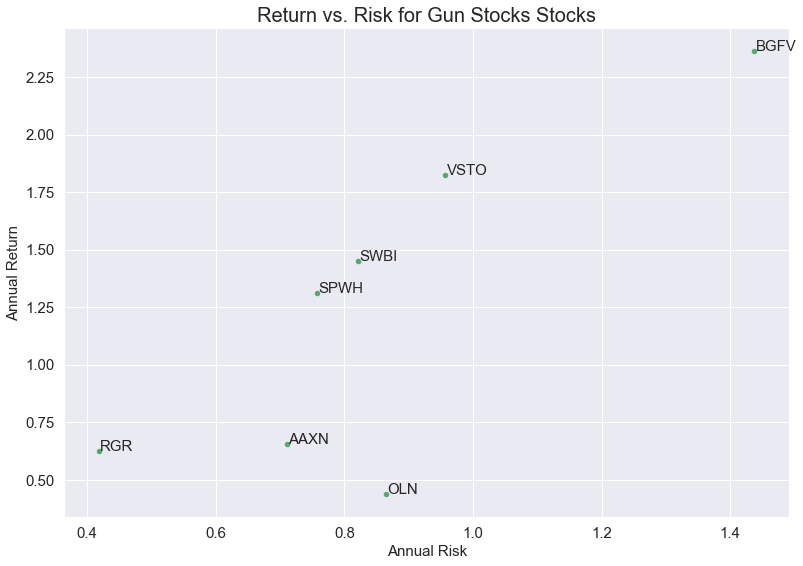

In [26]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [27]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

BGFV  BGFV    1.000000
AAXN  AAXN    1.000000
RGR   RGR     1.000000
VSTO  VSTO    1.000000
SPWH  SPWH    1.000000
OLN   OLN     1.000000
SWBI  SWBI    1.000000
      RGR     0.684784
RGR   SWBI    0.684784
VSTO  SWBI    0.497898
SWBI  VSTO    0.497898
OLN   AAXN    0.468956
AAXN  OLN     0.468956
RGR   SPWH    0.441878
SPWH  RGR     0.441878
VSTO  SPWH    0.436748
SPWH  VSTO    0.436748
AAXN  RGR     0.432793
RGR   AAXN    0.432793
      VSTO    0.431892
VSTO  RGR     0.431892
SWBI  SPWH    0.388067
SPWH  SWBI    0.388067
      OLN     0.348395
OLN   SPWH    0.348395
SPWH  AAXN    0.329527
AAXN  SPWH    0.329527
VSTO  OLN     0.328790
OLN   VSTO    0.328790
VSTO  AAXN    0.300096
AAXN  VSTO    0.300096
      BGFV    0.289004
BGFV  AAXN    0.289004
      SPWH    0.277252
SPWH  BGFV    0.277252
OLN   RGR     0.257333
RGR   OLN     0.257333
SWBI  AAXN    0.238493
AAXN  SWBI    0.238493
OLN   BGFV    0.235032
BGFV  OLN     0.235032
VSTO  BGFV    0.201950
BGFV  VSTO    0.201950
RGR   BGFV 

In [28]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,SWBI,RGR,VSTO,OLN,SPWH,AAXN,BGFV
Date,,,,,,,
2020-01-03,0.670819,0.585887,0.414759,0.354235,0.489663,0.281784,0.359814
2020-01-06,0.696922,0.640723,0.449774,0.409711,0.697231,0.183083,0.449334
2020-01-07,0.613226,0.519503,0.389082,0.402981,0.560619,0.417724,0.322025
2020-01-08,0.645697,0.631184,0.399484,0.381593,0.551843,0.370384,0.377091
2020-01-09,0.617399,0.496069,0.416944,0.378739,0.265476,0.399749,0.351285


In [29]:
Normalized_Value.corr()

,SWBI,RGR,VSTO,OLN,SPWH,AAXN,BGFV
SWBI,1.000000,0.684784,0.497898,0.117901,0.388067,0.238493,0.114331
RGR,0.684784,1.000000,0.431892,0.257333,0.441878,0.432793,0.147055
VSTO,0.497898,0.431892,1.000000,0.328790,0.436748,0.300096,0.201950
OLN,0.117901,0.257333,0.328790,1.000000,0.348395,0.468956,0.235032
SPWH,0.388067,0.441878,0.436748,0.348395,1.000000,0.329527,0.277252
AAXN,0.238493,0.432793,0.300096,0.468956,0.329527,1.000000,0.289004
BGFV,0.114331,0.147055,0.201950,0.235032,0.277252,0.289004,1.000000


In [30]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

BGFV  BGFV    1.000000
AAXN  AAXN    1.000000
RGR   RGR     1.000000
VSTO  VSTO    1.000000
SPWH  SPWH    1.000000
OLN   OLN     1.000000
SWBI  SWBI    1.000000
      RGR     0.684784
RGR   SWBI    0.684784
VSTO  SWBI    0.497898
SWBI  VSTO    0.497898
OLN   AAXN    0.468956
AAXN  OLN     0.468956
RGR   SPWH    0.441878
SPWH  RGR     0.441878
VSTO  SPWH    0.436748
SPWH  VSTO    0.436748
AAXN  RGR     0.432793
RGR   AAXN    0.432793
      VSTO    0.431892
VSTO  RGR     0.431892
SWBI  SPWH    0.388067
SPWH  SWBI    0.388067
      OLN     0.348395
OLN   SPWH    0.348395
SPWH  AAXN    0.329527
AAXN  SPWH    0.329527
VSTO  OLN     0.328790
OLN   VSTO    0.328790
VSTO  AAXN    0.300096
AAXN  VSTO    0.300096
      BGFV    0.289004
BGFV  AAXN    0.289004
      SPWH    0.277252
SPWH  BGFV    0.277252
OLN   RGR     0.257333
RGR   OLN     0.257333
SWBI  AAXN    0.238493
AAXN  SWBI    0.238493
OLN   BGFV    0.235032
BGFV  OLN     0.235032
VSTO  BGFV    0.201950
BGFV  VSTO    0.201950
RGR   BGFV 

In [31]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
SWBI    0.005752
RGR     0.002483
VSTO    0.007233
OLN     0.001741
SPWH    0.005202
AAXN    0.002604
BGFV    0.009370
dtype: float64
--------------------------------------------------
Stock risks:
SWBI    0.051697
RGR     0.026337
VSTO    0.060272
OLN     0.054436
SPWH    0.047727
AAXN    0.044718
BGFV    0.090559
dtype: float64


In [32]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
OLN,0.001741,0.054436
RGR,0.002483,0.026337
AAXN,0.002604,0.044718
SPWH,0.005202,0.047727
SWBI,0.005752,0.051697
VSTO,0.007233,0.060272
BGFV,0.009370,0.090559


In [33]:
table.sort_values(by='Risk')

,Returns,Risk
RGR,0.002483,0.026337
AAXN,0.002604,0.044718
SPWH,0.005202,0.047727
SWBI,0.005752,0.051697
OLN,0.001741,0.054436
VSTO,0.007233,0.060272
BGFV,0.009370,0.090559


In [34]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
SWBI,0.005752,0.051697,-0.082178
RGR,0.002483,0.026337,-0.285412
VSTO,0.007233,0.060272,-0.045900
OLN,0.001741,0.054436,-0.151718
SPWH,0.005202,0.047727,-0.100536
AAXN,0.002604,0.044718,-0.165402
BGFV,0.009370,0.090559,-0.006960


In [35]:
table['Max Returns'] = rets.max()

In [36]:
table['Min Returns'] = rets.min()

In [37]:
table['Median Returns'] = rets.median()

In [38]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
SWBI,0.005752,0.051697,-0.082178,0.175410,-0.307766,0.002395,2.068127
RGR,0.002483,0.026337,-0.285412,0.094001,-0.111491,-0.000192,2.446855
VSTO,0.007233,0.060272,-0.045900,0.376271,-0.269072,0.004587,1.212415
OLN,0.001741,0.054436,-0.151718,0.266595,-0.177956,0.004182,-2.050107
SPWH,0.005202,0.047727,-0.100536,0.180328,-0.169173,0.002745,0.469483
AAXN,0.002604,0.044718,-0.165402,0.225526,-0.136313,0.001919,4.377837
BGFV,0.009370,0.090559,-0.006960,0.472036,-0.265306,0.000000,5.717753


In [39]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
SWBI,0.005752,0.051697,-0.082178,0.175410,-0.307766,0.002395,2.068127,0.000071
RGR,0.002483,0.026337,-0.285412,0.094001,-0.111491,-0.000192,2.446855,0.000084
VSTO,0.007233,0.060272,-0.045900,0.376271,-0.269072,0.004587,1.212415,0.000042
OLN,0.001741,0.054436,-0.151718,0.266595,-0.177956,0.004182,-2.050107,-0.000072
SPWH,0.005202,0.047727,-0.100536,0.180328,-0.169173,0.002745,0.469483,0.000016
AAXN,0.002604,0.044718,-0.165402,0.225526,-0.136313,0.001919,4.377837,0.000149
BGFV,0.009370,0.090559,-0.006960,0.472036,-0.265306,0.000000,5.717753,0.000194


In [40]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
SWBI,0.005752,0.051697,-0.082178,0.175410,-0.307766,0.002395,2.068127,0.000071,1.147430
RGR,0.002483,0.026337,-0.285412,0.094001,-0.111491,-0.000192,2.446855,0.000084,0.452477
VSTO,0.007233,0.060272,-0.045900,0.376271,-0.269072,0.004587,1.212415,0.000042,1.580454
OLN,0.001741,0.054436,-0.151718,0.266595,-0.177956,0.004182,-2.050107,-0.000072,0.048864
SPWH,0.005202,0.047727,-0.100536,0.180328,-0.169173,0.002745,0.469483,0.000016,1.032016
AAXN,0.002604,0.044718,-0.165402,0.225526,-0.136313,0.001919,4.377837,0.000149,0.329131
BGFV,0.009370,0.090559,-0.006960,0.472036,-0.265306,0.000000,5.717753,0.000194,1.608315


In [41]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
OLN,0.001741,0.054436,-0.151718,0.266595,-0.177956,0.004182,-2.050107,-0.000072,0.048864
SPWH,0.005202,0.047727,-0.100536,0.180328,-0.169173,0.002745,0.469483,0.000016,1.032016
VSTO,0.007233,0.060272,-0.045900,0.376271,-0.269072,0.004587,1.212415,0.000042,1.580454
SWBI,0.005752,0.051697,-0.082178,0.175410,-0.307766,0.002395,2.068127,0.000071,1.147430
RGR,0.002483,0.026337,-0.285412,0.094001,-0.111491,-0.000192,2.446855,0.000084,0.452477
AAXN,0.002604,0.044718,-0.165402,0.225526,-0.136313,0.001919,4.377837,0.000149,0.329131
BGFV,0.009370,0.090559,-0.006960,0.472036,-0.265306,0.000000,5.717753,0.000194,1.608315
